# Hierarchical Latent SVD Model

As an extended idea of latent distance models (LDM), the latent eigenmodel was introduced to capture both homophily and stochastic equivalence among nodes. The main difference between LDMs and eigenmodels is the choice of the function dependent on the latent space. More specifically, eigenmodels use $a(u_i,u_j) = u_i^T\Lambda u_j$ instead of mere physical distance function. Besides, all latent class, distance and eigenmodels only deal with the symmetric function $d$ or $a$. However; the function also can be asymmetric if there exist sender and receiver effects are different. It is so-called SVD model, and the model specification is as follows:

$$\text{logit}P(Y_{ij}=1) = \beta^TX_{ij} + a_i + b_j + u_i^Tv_j + 
\epsilon_{ij}$$ 

where $u$ and $v$ are vectors of latent nodal attributes, and $a_i$ and $b_i$  are terms for nodal heterogeneity. 

## MCMC Derivation

\begin{align*}
\mathbf{Y}_{ijk} &= \mathbb{1}_{[\mathbf{Z}_{ijk}>0]}\\
\mathbf{Z}_{ijk} &= \sum_{p=0}^{P}\beta_{pk}^T\mathbf{X}_{ijpk} + a_{ik} + b_{jk} + u_{ik}^Tv_{jk} + \epsilon_{ijk}\\
(a_{ik}, b_{ik}) &\stackrel{iid}{\sim} MVN_2((0,0), \mathbf{\Sigma}_{ab})\\
(u_{ik}, v_{ik}) &\stackrel{iid}{\sim} MVN_4((0,0,0,0), \mathbf{\Sigma}_{uv})\\
(\epsilon_{ijk}, \epsilon_{jik}) &\stackrel{iid}{\sim} MVN_2\Big( 
  \begin{pmatrix} 0 \\ 0 \end{pmatrix},\begin{pmatrix} 1 & \rho_k \\ \rho_k & 1 \end{pmatrix}\Big)\\
\beta_{p}  &\sim N(\mu_p, \sigma_p^2)\\
\mu_p  &\sim N(\lambda, \tau^2)\\
\sigma_p^2  &\sim IG(\nu_0, S_0)\\
\mathbf{\Sigma}_{ab} &\sim IWishart(\nu_{ab},S_{ab}^{-1})\\
\mathbf{\Sigma}_{uv} &\sim IWishart(\nu_{uv},S_{uv}^{-1})\\
\end{align*}

\noindent Update $Z_{ijk}, Z_{jik}$:

\begin{align*}
(\mathbf{Z}_{ijk}, \mathbf{Z}_{jik}) &\stackrel{iid}{\sim} MVN_2\Big( 
  \begin{pmatrix} \sum_{p=0}^{P}\mathbf{X}_{ijpk}\beta_{pk} + a_{ik} + b_{jk} + u_{ik}^Tv_{jk} \\ \sum_{p=0}^{P}\mathbf{X}_{ijpk}\beta_{pk} + a_{jk} + b_{ik} + u_{jk}^Tv_{ik} \end{pmatrix},\begin{pmatrix} 1 & \rho_k \\ \rho_k & 1 \end{pmatrix}\Big)\\
\end{align*}

Let $\eta_{ijk} = \sum_{p=0}^{P}\mathbf{X}_{ijpk}\beta_{pk} + a_{ik} + b_{jk} + u_{ik}^Tv_{jk}$

\begin{align*}
\mathbf{Z}_{ijk}|\mathbf{Z}_{jik} &\sim N(\eta_{ijk} + \rho_k\cdot(\mathbf{Z}_{jik} - \eta_{jik}), 1 - \rho_k^2)\\
\\
\text{Pr}(\mathbf{Z}_{ijk} | \mathbf{Z}_{jik}, \mathbf{Y}_{ijk} = 1, \cdots) &\propto \text{Pr}(\mathbf{Y}_{ijk} = 1 | \cdots) \cdot \text{Pr}(\mathbf{Z}_{ijk} | \mathbf{\mathbf{Z}}_{jik})\\
&= \left\{
\begin{array}{c l}	
     \mathbb{1}_{[\mathbf{Z}_{ijk} > 1]} \cdot dN(\mathbf{Z}_{ijk}; \eta_{ijk} + \rho_k\cdot(\mathbf{Z}_{jik} - \eta_{jik}), 1 - \rho_k^2 ) \text{ if } Y_{ijk} = 1\\
     \mathbb{1}_{[\mathbf{Z}_{ijk} < 1]} \cdot dN(\mathbf{Z}_{ijk}; \eta_{ijk} + \rho_k\cdot(\mathbf{Z}_{jik} - \eta_{jik}), 1 - \rho_k^2 ) \text{ if } Y_{ijk} = 0
\end{array}\right.
\end{align*}

\noindent Update $\beta_{k}$:

Let $\bar{\mathbf{Z}}_{ijk} = \mathbf{Z}_{ijk} - a_{ik} - b_{jk} - u_{ik}^Tv_{jk}$

\begin{align*}
\text{Pr}(\bar{\mathbf{Z}}_{ijk}) &\propto \prod_{i \neq j}^{n_k}\exp\Bigg(-\frac{1}{2} \begin{pmatrix} \bar{\mathbf{Z}}_{ijk} - \sum_{p}\mathbf{X}_{ijpk}\beta_{pk}\\ \bar{\mathbf{Z}}_{jik} - \sum_{p}\mathbf{X}_{jipk}\beta_{pk} \end{pmatrix}^T \mathbf{\Sigma}_{\rho}^{-1} \begin{pmatrix} \bar{\mathbf{Z}}_{ijk} - \sum_{p}\mathbf{X}_{ijpk}\beta_{pk}\\ \bar{\mathbf{Z}}_{jik} - \sum_{p}\mathbf{X}_{jipk}\beta_{pk}  \end{pmatrix}\Bigg)\\%\cdot \text{dNorm}(\beta_k; \mu, \sigma^2)\\
\therefore \text{Pr}(\bar{\mathbf{Z}}_{ijk}|\bar{\mathbf{Z}}_{jik}) &\sim N(\sum_{p}\mathbf{X}_{ijpk}\beta_{pk} + \rho_k(\bar{\mathbf{Z}}_{jik}- \sum_{p}\mathbf{X}_{jipk}\beta_{pk}), 1-\rho_k^2)\\
&\propto \prod_{i \neq j} \exp\Bigg(-\frac{1}{2}\Big(\bar{Z}_{ijk} - \rho_k\sum_{p}\mathbf{X}_{jipk})\beta_{pk} - \rho_k(\bar{Z}_{jik} - X_{jik}\beta_k)\Big)^2 \cdot (1 - \rho_k^2)^{-1}\Bigg)\\
\therefore \text{Pr}(\beta_k | \mathbf{Z}_k) &\propto \prod_{i \neq j} \exp\Bigg(-\frac{1}{2} \Big( (X_{ijk} - \rho_k \sum_{p}\mathbf{X}_{jipk})\beta_{pk} - \bar{Z}_{ijk} - \rho_k \bar{Z}_{jik} \Big)^2 \cdot (1-\rho_k^2)^{-1}\Bigg) \cdot \text{dN}(\beta_k; \mu, \mathbf{\Sigma}_{\beta})\\
&\propto 
\exp{\Bigg(-\frac{1}{2}}(1-\rho_k^2)^{-1} \Big(\mathbf{\Theta}_{\beta} \vec{\beta}_k - \text{vec}(\mathbf{Z}_{k}) + \rho_k \text{vec}(\mathbf{Z}^T_{k})\Big)^T \Big(\mathbf{\Theta}_{\beta} \vec{\beta}_k - \text{vec}(\mathbf{Z}_{k}) + \rho_k \text{vec}(\mathbf{Z}^T_{k})\Big)\Bigg)\\
&\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \times \exp{\Bigg(-\frac{1}{2}(\vec{\beta_k}-\vec{\mu})^T\mathbf{\Sigma}_\beta^{-1}(\vec{\beta_k}-\vec{\mu})\Bigg)}\\
\end{align*}
where $\mathbf{\Theta}_{\beta}$ is a vector length of $n(n-1)$, and, 
$$\mathbf{\Theta}_{\beta} = \Big(\begin{pmatrix}  | & \cdots & | \\ \text{vec}(\mathbf{X}_{1k}) & \cdots  &\text{vec}(\mathbf{X}_{Pk}) \\ | & \cdots & |\end{pmatrix} - \rho_k \begin{pmatrix}  | & \cdots & | \\ \text{vec}(\mathbf{X}^T_{1k}) & \cdots  &\text{vec}(\mathbf{X}^T_{Pk}) \\ | & \cdots & |\end{pmatrix} \Big)$$
Thus, we have $\mathbf{V}_n = \mathbf{A}_n^{-1}$ where $\mathbf{A}_n = \mathbf{A}_0 + \mathbf{A}_1$, and $\mathbf{A}_0 = \mathbf{\Sigma}_{\beta}^{-1}$, $\mathbf{A}_1 = (1-\rho_k^2)^{-1}\mathbf{\Theta}_{\beta}^{T}\mathbf{\Theta}_{\beta}$

$\mu_n = \mathbf{V}_nm_n$ where $m_n = m_0 + m_1$, and $m_0 = \mathbf{\Sigma}_{\beta}^{-1}\mu$ and $m_1 = (1-\rho_k^2)^{-1}\mathbf{\Theta}_{\beta}^{T}\Big(\text{vec}(\mathbf{Z}_k) - \rho_k\text{vec}(\mathbf{Z}_k^T)\Big)$


\noindent Update $a_i,b_i$: 

Let 
$\hat{\mathbf{Z}}_{ijk} = \mathbf{Z}_{ijk} - \sum_{p}\mathbf{X}_{ijpk}\beta_{pk} - u_{ik}^Tv_{jk}$


\begin{align*}
\text{Pr}\Bigg(\begin{pmatrix}a_{ik} \\ b_{ik}\end{pmatrix}| \begin{pmatrix} \hat{Z}_{ijk}\\ \hat{Z}_{jik} \end{pmatrix}, \dots\Bigg) &\propto \\ & \prod_{i \neq j}^{n_k}\exp\Bigg(-\frac{1}{2} \begin{pmatrix} \hat{Z}_{ijk} - a_{ik} - b_{jk}\\ \hat{Z}_{jik} - a_{jk}-b_{ik} \end{pmatrix}^T \Sigma_{\rho}^{-1} \begin{pmatrix} \hat{Z}_{ijk}-a_{ik}-b_{jk}\\ \hat{Z}_{jik}-a_{jk}-b_{ik} \end{pmatrix}\Bigg)\cdot \text{dMVN}_2\Bigg(\begin{pmatrix}a_{ik} \\ b_{ik}\end{pmatrix}; \begin{pmatrix} 0\\ 0\end{pmatrix}, \Sigma_{ab}\Bigg)\\
\therefore \text{Pr}(\hat{\mathbf{Z}}_{ijk}|\hat{\mathbf{Z}}_{jik}) &\sim N(a_{ik} - (-b_{jk} - \rho_k(\hat{\mathbf{Z}}_{jik} - a_{jk} - b_{ik})), 1-\rho_k^2)\\
\therefore \text{Pr}(a_{ik}|\mathbf{Z}_k) &\propto
\prod_{j \neq i}\exp\Bigg(-\frac{1}{2}(1- \rho_k^2)^{-1}(\hat{\mathbf{Z}}_{ijk} - a_{ik} - b_{jk} - \rho_k(\hat{\mathbf{Z}}_{jik} - a_{jk} - b_{ik}))^2\Bigg)\\
& \,\,\,\,\,\,\,\,\,\,\,\, \cdot \text{dN}(a_{ik}|b_{ik}\,\, ; \,\, \mu_{a|b} = \mathbf{\Sigma}_{ab[1,2]}\mathbf{\Sigma}_{ab[2,2]}^{-1}b_{ik}, \,\, \sigma^2_{a|b} = \mathbf{\Sigma}_{ab[1,1]}-\mathbf{\Sigma}_{ab[1,2]}\mathbf{\Sigma}_{ab[2,2]}^{-1}\mathbf{\Sigma}_{ab[2,1]})\\
&\propto \exp\Bigg(-\frac{1}{2}(1-\rho_k)^{-1}\sum_{j \neq i}(a_{ik} - \theta_{j})^{T}(a_{ik} - \theta_{j})\Bigg) \cdot \exp \Bigg(-\frac{1}{2}(a_{ik} - \mu_{a|b})^2 \sigma^{-2}_{a|b}\Bigg)\end{align*}

$\text{where } \theta_{j} = -b_{jk} - \rho_k(\hat{\mathbf{Z}}_{jik} - a_{jk} - b_{ik}) + \hat{\mathbf{Z}}_{ijk}$ and $i$ is fixed.
Then, we can easily figure out its posterior mean and variance.

$\mathbf{V}_n = \mathbf{A}_n^{-1} \text{ where } \mathbf{A}_n = \mathbf{A}_0 + \mathbf{A}_1, \text{ and } \mathbf{A}_0 = \sigma^{-2}_{a|b}, \mathbf{A}_1 = (n_k - 1)(1-\rho_k^2)^{-1}$

$\mu_n = \mathbf{V}_nm_n$ where $m_n = m_0 + m_1$, and $m_0 = \sigma_{a|b}^{-2}\mu_{a|b}$ and $m_1 = (1-\rho_k^2)^{-1}\sum_{j\neq i}{\theta}_{j}$

\noindent Likewise, we can update $b_{ik}$.

\noindent Update $u_i, v_i$:

Let $\tilde{Z}_{ijk} = Z_{ijk} - X_{ijk}\beta_k - a_{ik} - b_{jk}$
\begin{align*}
p\Bigg(\begin{pmatrix}u_{ik} \\ v_{ik}\end{pmatrix} | \begin{pmatrix} \tilde{Z}_{ijk}\\ \tilde{Z}_{jik} \end{pmatrix},\dots \Bigg) &\propto\\ &\prod_{i \neq j}^{n_k}\exp\Bigg(-\frac{1}{2} \begin{pmatrix} \tilde{Z}_{ijk} - u_{ik}^Tv_{jk}\\ \tilde{Z}_{jik} - u_{ik}^Tv_{jk} \end{pmatrix}^T \Sigma_{\rho}^{-1} \begin{pmatrix} \tilde{Z}_{ijk}-u_{ik}^Tv_{jk}\\ \tilde{Z}_{jik}-u_{ik}^Tv_{jk} \end{pmatrix}\Bigg)\cdot \text{dMVN}_4\Bigg(\begin{pmatrix}u_{ik} \\ v_{ik}\end{pmatrix}; \begin{pmatrix} 0\\ 0\\0\\0\end{pmatrix}, \Sigma_{uvk}\Bigg)\\
\therefore \text{Pr}(\tilde{Z}_{ijk}|\tilde{Z}_{jik}) &\sim \text{N}(u_{ik}^Tv_{jk} + \rho_k(\tilde{Z}_{jik}- u_{jk}^Tv_{ik}), 1-\rho_k^2)\\
\therefore \text{Pr}(u_{ik}|\tilde{Z}_k) &\propto \prod_{j \neq i}\exp\Bigg(-\frac{1}{2}(1-\rho_k^2)^{-1}(\tilde{Z}_{ijk} - u_{ik}^Tv_{jk} - \rho_k(\tilde{Z}_{jik}-u_{jk}^Tv_{ik}))^2\Bigg)\\
& \,\,\,\,\,\,\,\,\,\, \text{dMVN}_2(u_{ik}|v_{ik} \,\, ; \,\, \mu_{u|v} = \Sigma_{uv[1,2]}\Sigma_{uv[2,2]}^{-1}v_{ik}, \,\, \Sigma_{u|v} = \Sigma_{uv[1,1]} - \Sigma_{uv[1,2]}\Sigma_{uv[2,2]}^{-1} \Sigma_{uv[2,1]})\\
&\propto \exp\Bigg(-\frac{1}{2}(1-\rho_k^2)^{-1}(\mathbf{\Theta}_{V}u_{ik}- \vec{\mu}_u)^T (\mathbf{\Theta}_{v}u_{ik}- \vec{\mu}_u)\Bigg) \cdot \exp\Bigg(-\frac{1}{2}(u_{ik}-\mu_{u|v})^T\Sigma_{u|v}(u_{ik}-\mu_{u|v})\Bigg)\\
\text{Where } &\mathbf{\Theta}_{V} = \begin{pmatrix}  | & | \\ \vec{v}_{jk[-i,1]} & \vec{v}_{jk[-i,2]}   \\ | & |\end{pmatrix} \text{ ,and } \vec{\mu}_u = \begin{pmatrix} | \\ \tilde{Z}_{i,\cdot,k} - \rho_k(\tilde{Z}_{\cdot,i,k} - u_{\cdot}^{T}v_{i})\\ | \end{pmatrix}\\
&\text{, and dimensions are }(n_k-1)\times 2 \text{and } (n_k-1)\times 1, \text{respectively.}\\
\end{align*}
Then, we have $\mathbf{V}_n = \mathbf{A}_n^{-1} \text{ where } \mathbf{A}_n = \mathbf{A}_0 + \mathbf{A}_1, \text{ and } \mathbf{A}_0 = \Sigma^{-1}_{u|v}, \mathbf{A}_1 = (1-\rho_k^2)^{-1}\mathbf{\Theta}_{V}^T\mathbf{\Theta}_{V}$

$\mu_n = \mathbf{V}_nm_n$ where $m_n = m_0 + m_1$, and $m_0 = \Sigma_{u|v}^{-1}\mu_{u|v}$ and $m_1 = (1-\rho_k^2)^{-1}\mathbf{\Theta}_{V}^T\vec{\mu}_u$.

\noindent Update $\rho_k$:
Let $\tilde{\epsilon}_{ijk} = Z_{ijk} - X_{ijk}\beta_k - a_{ik} - b_{jk}-  u_{ik}^Tv_{jk}$

\begin{align*}
p\Bigg(\rho_k| \begin{pmatrix} \tilde{\epsilon}_{ijk}\\ \tilde{\epsilon}_{jik} \end{pmatrix},\dots \Bigg) &\propto \prod_{i \neq j}^{n_k}\exp\Bigg(-\frac{1}{2} \begin{pmatrix} \tilde{\epsilon}_{ijk}\\ \tilde{\epsilon}_{jik}\end{pmatrix}^T \Sigma_{\rho}^{-1} \begin{pmatrix} \tilde{\epsilon}_{ijk}\\ \tilde{\epsilon}_{jik} \end{pmatrix}\Bigg)\cdot \text{dUnif}(\rho_k; -1, 1)
\end{align*}
To update $\rho_k$, Metropolis-Hastings is needed due to non-conjugacy.

\noindent Update $\mu$:
\begin{align*}
p(\mu|\vec{Y}, \dots) &\propto \prod_{k=1}^{K}\text{dNorm}(\beta_{k}; \mu, \sigma) \cdot \text{dNorm}(\mu;\lambda,\tau)\\
&\sim \text{N}(\mu; \frac{\lambda/\tau + \sum_{k}\beta_{k}/\sigma^2}{(1\tau + K/\sigma^2)}, (1/\tau + K/\sigma^2)^{-1})
\end{align*}

\noindent Update $\sigma^2$:
\begin{align*}
p(\sigma^2|\vec{Y}, \dots) &\propto \prod_{k=1}^{K}\text{dNorm}(\beta_{k}; \mu, \sigma) \cdot \text{dIG}(\sigma^2;\nu_0,S_0)\\
&\sim \text{IG}(\sigma^2; \frac{\nu_0 + K}{2}, \frac{\nu_0 \cdot S_0 + \sum_k(\beta_{k}-\mu)^2}{2})
\end{align*}

\noindent Update $\Sigma_{ab}$:
\begin{align*}
p(\Sigma_{abk}|\vec{Y}, \dots) &\propto \prod_{i=1}^{n_k}\text{dMVN}\Bigg(\begin{pmatrix} a_{ik}\\ b_{ik}\end{pmatrix}; \vec{0}, \Sigma_{ab}\Bigg) \cdot \text{dIWishart}(\Sigma_{ab};\nu_{ab} ,S_{abk}^{-1})\\
&\sim \text{IWishart}(\Sigma_{abk}; \nu_{ab} + n_k,[S_{ab} + \sum_{i=1}^{n_k}\begin{pmatrix} a_{ik}\\ b_{ik}\end{pmatrix}\begin{pmatrix} a_{ik}\\ b_{ik}\end{pmatrix}^T]^{-1})
\end{align*}

\noindent Update $\Sigma_{uv}$:
\begin{align*}
p(\Sigma_{uvk}|\vec{Y}, \dots) &\propto \prod_{i=1}^{n_k}\text{dMVN}\Bigg(\begin{pmatrix} u_{ik}\\ v_{ik}\end{pmatrix}; \vec{0}, \Sigma_{uv}\Bigg) \cdot \text{dIWishart}(\Sigma_{uvk};\nu_{uv} ,S_{uv}^{-1})\\
&\sim \text{IWishart}(\Sigma_{uvk}; \nu_{uv} + n_k,[S_{uv} + \sum_{i=1}^{n_k}\begin{pmatrix} u_{ik}\\ v_{ik}\end{pmatrix}\begin{pmatrix} u_{ik}\\ v_{ik}\end{pmatrix}^T]^{-1})
\end{align*}


## Coding (Temporary)

For the following function, two main arguments are required: data and edge_covariate. Both arguments should follow a list format. For now, the argument, edge_covariate, takes only one edge-specific covariate. 

In [47]:
hsvd = function(data, edge_covariate, dyad_dep = T, num_iter = 1000, verbose = T){

  suppressMessages(require(tmvtnorm))
  suppressMessages(require(mvtnorm))
  suppressMessages(require(truncnorm))
  suppressMessages(require(MCMCpack))

  iternum = num_iter
  Y = data
  COV = edge_covariate
  K = length(Y)
  nk = unlist(lapply(Y, nrow))
  
   # Create a list to collect MCMC samples
    Chain = list("beta" = list(), 
                 "rho" = matrix(nrow=iternum, ncol=K), 
                 "sigma_ab" = list(), "sigma_uv" = list(),
                 "U" = list(), "V" = list(), 
                 "a" = list(), "b" = list(), 
                 "z" = list(), "mu" = matrix(nrow=iternum, ncol=2))
    
    for (i in 1:K){
      Chain$U[[i]] = Chain$V[[i]] = list()
      for (j in 1:iternum){
        Chain$U[[i]][[j]] = Chain$V[[i]][[j]] = list()
      }
      Chain$beta[[i]] = matrix(nrow=iternum,ncol=2)
      Chain$a[[i]] = Chain$b[[i]] = matrix(nrow=iternum, ncol=nk[i])
    }
    
    # Initial points for parameters
    {
      beta0 = rep(0,K)
      beta1 = rep(0,K)
      beta = cbind(beta0,beta1)
      mu0 = mu = 0
      s02 = s2 = 1
      # sigma_uv
      sigma_uv =  matrix(0.5,4,4)
      diag(sigma_uv) = 1
      
      # Random Initial points for U and V
      U = V = list()
      for (i in 1:K){
        U[[i]] = as.matrix(rmvnorm(nk[i],c(0,0),sigma_uv[1:2,1:2]),ncol=2)
        V[[i]] = as.matrix(rmvnorm(nk[i],c(0,0),sigma_uv[3:4,3:4]),ncol=2)
      }
      
      
      # Create Starting points for z, a, b
      z = a = b = list()
      
      # sigma_ab
      sigma_ab = matrix(c(1,0.5,0.5,1),2,2) 
      
      # fill in z,a,b with random numbers
      for (k in 1:K){
        z[[k]] = matrix(rnorm(nk[k]*nk[k]), ncol=nk[k],nrow=nk[k])
        diag(z[[k]]) = NA
        a[[k]] = b[[k]] = numeric(nk[k])
      }
      
      #initial for rho, beta0, beta1
      if (dyad_dep == T){
        rho = rep(0.5,K)
      } else rho = rep(0,K)
    }
  
  
  #MCMC
    
  ptm <- proc.time()
    for (k in 1:K){
      diag(Y[[k]]) = 0
      diag(Cov1[[k]]) = 0
      diag(z[[k]]) = 0 
    }
    
    for (sim in (1):(iternum)){
      
      for (k in 1:K){
        index = which(diag(nk[k]) == 1)
        
        ### Update Z ###
        etas = matrix(cbind(1,c(Cov1[[k]])) %*% beta[k,] +
                        rowSums(U[[k]][rep(seq_len(nrow(U[[k]])), nk[k]),] *
                                  V[[k]][rep(seq_len(nrow(V[[k]])), each=nk[k]),]) +
                        rep(a[[k]], nk[k]) +
                        rep(b[[k]], each=nk[k]),
                      nk[k],nk[k])
        
        diag(etas) = 0
        
        m = c(etas) + rho[k]*( c(t(z[[k]])) - c(t(etas)))
        
        z[[k]] = matrix(rtruncnorm(1,
                                   a = ifelse(c(Y[[k]]), 0, -Inf),
                                   b = ifelse(c(Y[[k]]), Inf, 0),
                                   mean = m, sd = sqrt(1-rho[k]^2)),
                        nrow = nk[k], ncol = nk[k])
      
        ### Update beta0, beta1 ###
        sigma_beta = matrix(c(s02,0,0,s2),2,2)
        
        zbar = matrix(
          c(z[[k]])-
            rep(a[[k]], nk[k]) - 
            rep(b[[k]], each=nk[k]) - 
            rowSums(U[[k]][rep(seq_len(nrow(U[[k]])), nk[k]),] *
                      V[[k]][rep(seq_len(nrow(V[[k]])), each=nk[k]),]),
          nk[k],nk[k])
        
        diag(zbar) = 0
        rp = 1 / (1-rho[k]^2)
        X = (cbind(1,c(Cov1[[k]])) - rho[k]*(cbind(1, c(t(Cov1[[k]])))))[-index,]
        
        V_beta = solve( solve(sigma_beta) + rp*crossprod(X))
        
        mu_beta = V_beta %*% ( solve(sigma_beta) %*% c(mu0,mu) 
                               + rp * crossprod(X, c(zbar)[-index] - rho[k] * c(t(zbar))[-index]))
        
        beta[k,] = rmvnorm(1, mu_beta, V_beta)
        
        ### Update a, b ###
        zhat = matrix( c(z[[k]]) -
                         c(cbind(1, c(Cov1[[k]]))%*%beta[k,]) -
                         rowSums(U[[k]][rep(seq_len(nrow(U[[k]])), nk[k]),] *
                                   V[[k]][rep(seq_len(nrow(V[[k]])), each=nk[k]),]),
                       nk[k], nk[k])
        
        S11 = sigma_ab[1,1]; S22 = sigma_ab[2,2]; S12 = S21 = sigma_ab[1,2]
        
        sigma2_a = S11 - S12%*% solve(S22) %*% S21
        sigma2_b = S22 - S21%*% solve(S11) %*% S12
        
        for (i in sample(1:nk[k])){
          theta_ai = sum(zhat[i,-i] - rho[k]*(zhat[-i,i] - a[[k]][-i] - b[[k]][i]) - b[[k]][-i])
          
          m_ab = S12%*%solve(S22)%*%b[[k]][i]
          
          A0 = 1/sigma2_a; A1 = (nk[k]-1) * rp
          m0 = 1/sigma2_a*m_ab; m1 = rp * theta_ai
          
          mu_ai = 1/(A0+A1)*(m0+m1)
          s2_ai = 1/(A0+A1)
          a[[k]][i] = rnorm(1, mu_ai, sqrt(s2_ai))
          
          
          theta_bi = sum(zhat[-i,i] - rho[k]*(zhat[i,-i] - b[[k]][-i] - a[[k]][i]) - a[[k]][-i])
          m_ba = S21%*%solve(S11)%*%a[[k]][i]
          A0 = 1/sigma2_b; A1 = (nk[k]-1) * rp
          m0 = 1/sigma2_b*m_ba; m1 = rp * theta_bi
          
          mu_bi = 1/(A0+A1)*(m0+m1)
          s2_bi = 1/(A0+A1)
          b[[k]][i] = rnorm(1, mu_bi, sqrt(s2_bi))
        }
        
  
        ### Update U, V ###

        ztilde = matrix( c(z[[k]]) -
                           cbind(1, c(Cov1[[k]]))%*%beta[k,] -
                           rep(a[[k]], nk[k]) - rep(b[[k]], each=nk[k]),
                         nk[k], nk[k])
        
        diag(ztilde) = 0
        
        S11 = sigma_uv[1:2,1:2]; S22 = sigma_uv[3:4,3:4]; S12 = sigma_uv[1:2,3:4]; S21 = sigma_uv[3:4,1:2]
        
        sigma2_u = S11 - S12%*% solve(S22) %*% S21
        sigma2_v = S22 - S21%*% solve(S11) %*% S12
        
        for (i in sample(1:nk[k])){
          Theta_V = V[[k]][-i,]
          mu_u = ztilde[i,-i] - c(rho[k]*(ztilde[-i,i] - U[[k]][-i,] %*% V[[k]][i,]))
          
          mu_uv = S12%*%solve(S22)%*%V[[k]][i,]
          
          A0 = solve(sigma2_u); A1 = rp*crossprod(Theta_V)
          
          m0 = solve(sigma2_u)%*%mu_uv; m1 = rp*crossprod(Theta_V,mu_u)
          
          mu_ui = solve(A0+A1)%*%(m0+m1)
          
          U[[k]][i,] = mvrnorm(1,mu_ui,solve(A0+A1))
          
          Theta_U = U[[k]][-i,]
          mu_v = ztilde[-i,i] - c(rho[k]*(ztilde[i,-i] - V[[k]][-i,] %*% U[[k]][i,]))
          
          mu_vu = S21%*%solve(S11)%*%U[[k]][i,]
          
          A0 = solve(sigma2_v); A1 = rp*crossprod(Theta_U)
          m0 = solve(sigma2_v)%*%mu_vu; m1 = rp*crossprod(Theta_U,mu_v)
          mu_vi = solve(A0+A1)%*%(m0+m1)
          
          V[[k]][i,] = mvrnorm(1,mu_vi,solve(A0+A1))
        }
        
        
        
        ### Update rho ###
        if (dyad_dep == T){
        etilde = matrix(c(z[[k]]) -
                          cbind(1, c(Cov1[[k]]))%*%beta[k,] -
                          rep(a[[k]], nk[k]) - rep(b[[k]], each=nk[k]) -
                          rowSums(U[[k]][rep(seq_len(nrow(U[[k]])), nk[k]),] * 
                                  V[[k]][rep(seq_len(nrow(V[[k]])), each=nk[k]),]),
                        nk[k],nk[k])
        diag(etilde) = 0
        EM<-cbind(etilde[upper.tri(etilde)],t(etilde)[upper.tri(etilde)] )
        emcp<-sum(EM[,1]*EM[,2])
        emss<-sum(EM^2)
        m<- nrow(EM)
        
        sr = 2 * (1-cor(etilde)[1,2]^2)/sqrt(m)
        
        rho_p = rho[k] + sr * qnorm( runif(1,pnorm( (-1-rho[k])/sr), pnorm( (1-rho[k])/sr)))

        rd <- (-.5*(m*log(1-rho_p^2)+(emss-2*rho_p*emcp)/(1-rho_p^2)))-
          (-.5*(m*log(1-rho[k]^2 )+(emss-2*rho[k]*emcp )/(1-rho[k]^2 )))+
          ( (-.5*log(1-rho_p^2)) - (-.5*log(1-rho[k]^2)) )
        
        
        if (log(runif(1)) < rd) rho[k] = rho_p
        }
        
        Chain$rho[sim,k] = rho[k]
        Chain$beta[[k]][sim,] = beta[k,]
        Chain$U[[k]][[sim]] = U[[k]]
        Chain$V[[k]][[sim]] = V[[k]]
        Chain$a[[k]][sim,] = a[[k]]
        Chain$b[[k]][sim,] = b[[k]]
      }
      
      ### Update Sigma_ab ###
      Sab0 = matrix(c(1,0,0,1),ncol=2); nuab0 = 2+2
      S_theta_ab = matrix(rowSums(apply(do.call(rbind,Map(cbind,a,b)) ,1,tcrossprod)),2,2)
      sigma_ab = riwish(v = nuab0 + sum(nk) , S = Sab0 + S_theta_ab)
      
      ### Update Sigma_uv ###
      Suv0 = matrix(c(rep(5,16)),ncol=4); diag(Suv0) = 10; nuuv0 = 4+2
      S_theta_uv = matrix(rowSums(apply(do.call(rbind,Map(cbind,U,V)),1,tcrossprod)),4,4)
      sigma_uv = riwish(v =nuuv0 + sum(nk), S= Suv0 + S_theta_uv)
      
      ### Update mu0 (mean of beta0) ###
      s00 = 1; mu00 = 0
      s02_n= (1/s00 + (K / s02))^(-1)
      mu0_n= (mu00 / s00 + sum(beta[,1]) / s02) * s02_n
      mu0 = rnorm(1, mu0_n, sqrt(s02_n)) 
      
      ### Update mu (mean of beta1) ###
      s10 = 1; mu10 = 0
      s2_n= (1/s10 + (K / s2))^(-1)
      mu_n= (mu10 / s10 + sum(beta[,2]) / s2) * s2_n
      mu = rnorm(1, mu_n, sqrt(s2_n))
      
      ### Update S0 (var of beta0) ###
      c = 200; d = 1.5  # Hyperparameters
      
      nu0_n = c + K
      ss0_n = 1/nu0_n * (c * d + (K-1)*var(beta[,1]) + K/(K+1)*(mean(beta[,1])-mu0)^2)
      s02 = 1/ rgamma(1, nu0_n/2, nu0_n*ss0_n/2)
      
      ### Update S1 (var of beta1) ###
      nu_n = c + K
      ss_n = 1/nu_n * (c * d + (K-1)*var(beta[,2]) + K/(K+1)*(mean(beta[,2])-mu)^2)
      s2 = 1/ rgamma(1, nu_n/2, nu_n*ss_n/2)
      
      Chain$sigma_ab[[sim]] = sigma_ab
      Chain$sigma_uv[[sim]] = sigma_uv
      Chain$mu[sim,] = cbind(mu0,mu)

      if (sim %% 100 == 0 & verbose == T) {
        ptm2 = (proc.time() - ptm)[3]
        cat(sim,"/",iternum,"   (time:", ptm2, ")", 
            "     (estimated time left:", ptm2*(iternum-sim)/100, ") \n")
        ptm = proc.time()
      }
    }
    return(Chain)
}

## Testing (with simulated data)

In [89]:
# 2 networks with sizes of 20 and 40.

suppressMessages(library(mvtnorm))

K = 2
Cov1 = list()
nk = c(20, 60)

set.seed(1)

for (i in 1:K){
  Cov1[[i]] = matrix(rnorm(nk[i]^2),nk[i],nk[i])
  diag(Cov1[[i]]) = NA
}

rho_sim = runif(K,0,0.5)
s2_sim = 0.5^2; s02_sim = 0.5^2
mu0_sim = -2; mu_sim = 1

beta0_sim = rnorm(K,mu0_sim,sqrt(s02_sim))
beta1_sim = rnorm(K,mu_sim,sqrt(s2_sim))

sigma_ab_sim = matrix(c(1,0.3,0.3,1),2,2)
sigma_uv_sim = matrix(c(1,0.7,0.1,0.1,0.7,1,0.1,0.1,0.1,0.1,1,0.45,0.1,0.1,0.45,1),4,4)

a_sim = b_sim = z = list()
for (k in 1:K){
  z[[k]] = matrix(0, ncol=nk[k],nrow=nk[k])
  diag(z[[k]]) = NA
  a_sim[[k]] = b_sim[[k]] = numeric(nk[k])
  
  for (i in 1:nk[k]){
    ab0 = rmvnorm(1,c(0,0),sigma_ab_sim)
    a_sim[[k]][i] = ab0[1]
    b_sim[[k]][i] = ab0[2]
  }
}

U_sim = V_sim = list()
for (i in 1:K){
  U_sim[[i]] = as.matrix(rmvnorm(nk[i],c(0,0),sigma_uv_sim[1:2,1:2]),ncol=2)
  V_sim[[i]] = as.matrix(rmvnorm(nk[i],c(0,0),sigma_uv_sim[3:4,3:4]),ncol=2)
}

Z = Ysim= list()
for (k in 1:K){
  Z[[k]] = matrix(0, ncol=nk[k], nrow=nk[k])
  for (i in 1:nk[k]){
    for (j in 1:nk[k]){
      if (i == j) next
      Z[[k]][i,j] = beta0_sim[k] + beta1_sim[k] * Cov1[[k]][i,j] + t(U_sim[[k]][i,])%*%V_sim[[k]][j,] + a_sim[[k]][i] + b_sim[[k]][j]
    }
  }
  
  w1 = sqrt((1 + sqrt(1-rho_sim^2))/2)
  w2 = sign(rho_sim)*sqrt(1-w1^2)
  EC = matrix(rnorm(length(Z[[k]])),nrow(Z[[k]]),nrow(Z[[k]]))
  EC = ( w1*EC + w2*t(EC) )
  ZS = Z[[k]]+EC
  YS <- 1 * (ZS > 0)
  diag(YS) <- NA
  Ysim[[k]] =YS
}

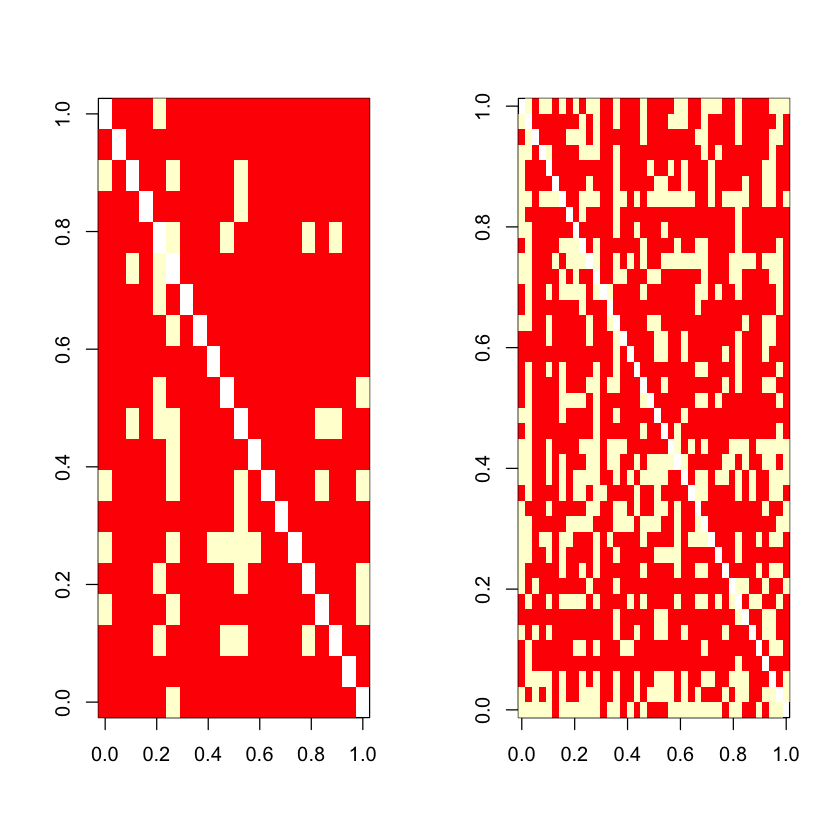

In [19]:
# Simulated Adjacency Matrices
# Diagonals are NAs
# red pixels are 0s, yellows are 1s
par(mfrow = c(1,2))
image(t(Ysim[[1]])[ncol(Ysim[[1]]):1,])
image(t(Ysim[[2]])[ncol(Ysim[[2]]):1,])

In [22]:
# results = hsvd(data = Ysim, edge_covariate = Cov1, dyad_dep = T, num_iter = 3000, verbose = F)

Loading required package: tmvtnorm
Loading required package: Matrix
Loading required package: stats4
Loading required package: gmm
Loading required package: sandwich
Loading required package: truncnorm
Loading required package: MCMCpack
Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2018 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [79]:
load("hsvd.rdata")

In [40]:
beta0_sim

[1] -2.961127 -1.190150

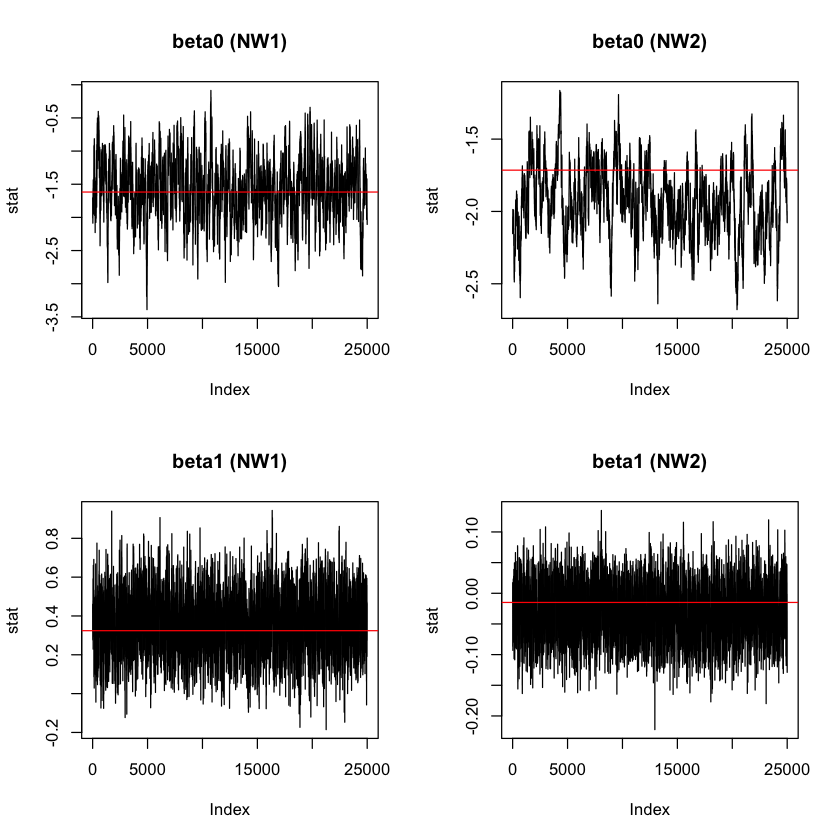

In [91]:
burnin = 5000
K=2
{par(mfrow=c(2,2))
  for (i in 1:K){
    stat = results$beta[[i]][-(1:burnin),1]
    lab = "beta0"
    
    if (NA %in% stat) stat = stat[-which(is.na(stat))]
    plot(stat, type="l", main=paste0(lab," (NW",i,")",sep = ""))
    abline(h = beta0_sim[i], col="red")
  }
      
  for (i in 1:K){
    stat = results$beta[[i]][-(1:burnin),2]
    lab = "beta1"
    
    if (NA %in% stat) stat = stat[-which(is.na(stat))]
    plot(stat, type="l", main=paste0(lab," (NW",i,")",sep = ""))
    abline(h = beta1_sim[i], col="red")
  }
  par(mfrow=c(1,1))
}


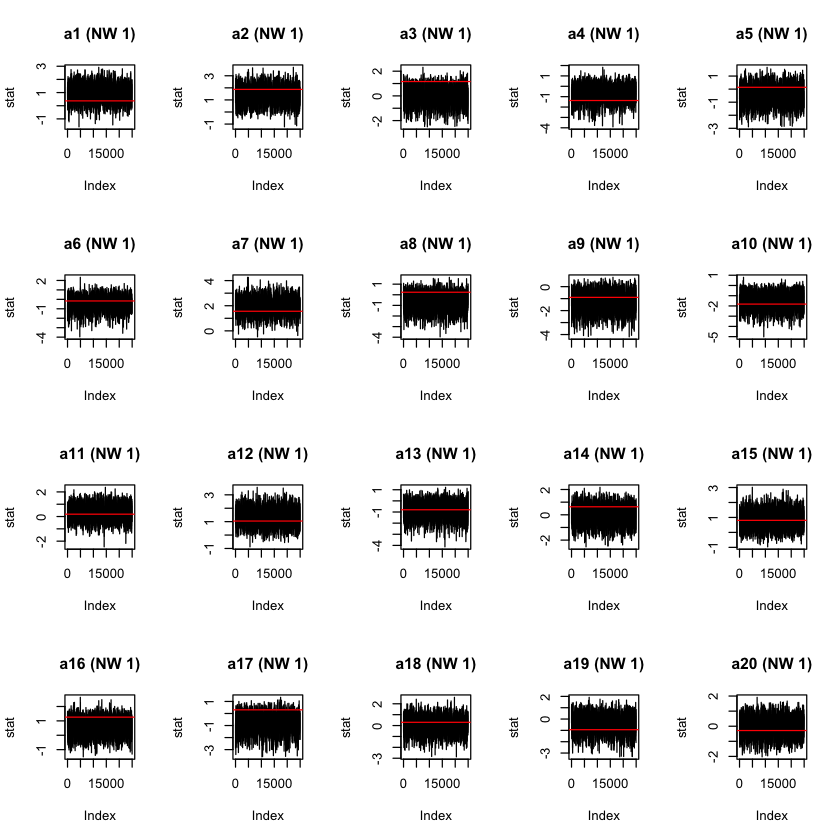

In [87]:
k = 1

{par(mfrow=c(4,5))
  for (i in 1:nk[k]){
    stat = results$a[[k]][-(1:burnin),i]
    lab = "a"
    
    if (NA %in% stat) stat = stat[-which(is.na(stat))]
    
    plot(stat, type="l", main=paste0(lab,i, " (NW ", k, ")", sep = ""))
    abline(h=a_sim[[k]][i], col="red")
  }
  par(mfrow=c(1,1))
}

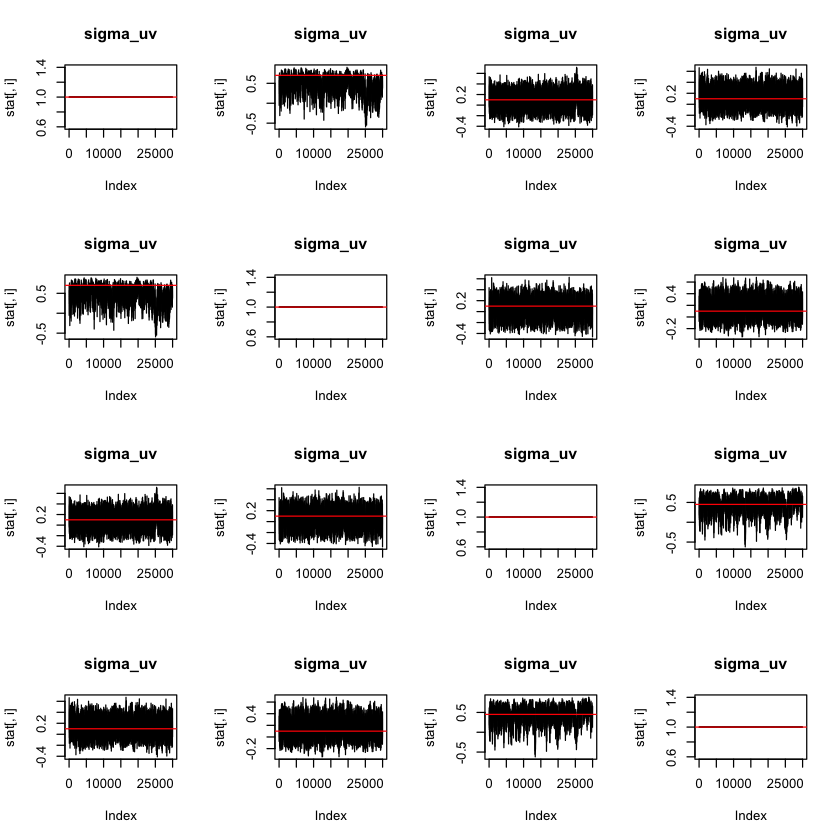

In [92]:
{par(mfrow=c(4,4))
  stat = do.call(rbind,lapply(results$sigma_uv, function(x) c(cov2cor(x))))
  lab = "sigma_uv"
  
  for (i in 1:16){
    if (NA %in% stat) stat = stat[-which(is.na(stat)),]
    
    plot(stat[,i], type="l", main=paste0(lab,sep = ""))
    abline(h=sigma_uv_sim[i], col="red")
  }
  par(mfrow=c(1,1))
}

30,000 posterior samples were gathered and trace plots are provided above. As can be seen, the trace plots well captures the true values (red horizontal line). In order to check the shrinkage effects from hierarchical modeling, comparison with AMEN package with real data will follow.

In [73]:
suppressMessages(library(HLSM))

# DATA from HLSM package
# Networks for advice-seeking activities among instructors in 15 different school.
# Edge-specific covariate is 1 if instructor i and j teach the same grade, 0 if otherwise.
K = 15
Cov1 = Y = list()
for (i in 1:K){
  Cov1[[i]] = ps.edge.vars.mat[[i]][,,3]
  diag(Cov1[[i]]) = NA
  Y[[i]] = ps.advice.mat[[i]]
}
nk = unlist(lapply(Y, nrow))

In [63]:
Chain = hsvd(data = Y, edge_covariate = Cov1, num_iter = 2000, verbose = F)

In [74]:
suppressMessages(library(amen))

AME_FIT = list()
for (k in 1:K){
y.array = array(Y[[k]], dim = c(nk[k],nk[k],1))
x.array = array(Cov1[[k]], dim = c(nk[k],nk[k],1,1))

AME_FIT[[k]] = amen::ame_rep(y.array, x.array, 
                         dcor = T, intercept = T,
                         symmetric = F, model="bin",
                         nscan = 5000, plot = F, print = F)
}


5  pct burnin complete 
10  pct burnin complete 
15  pct burnin complete 
20  pct burnin complete 
25  pct burnin complete 
30  pct burnin complete 
35  pct burnin complete 
40  pct burnin complete 
45  pct burnin complete 
50  pct burnin complete 
55  pct burnin complete 
60  pct burnin complete 
65  pct burnin complete 
70  pct burnin complete 
75  pct burnin complete 
80  pct burnin complete 
85  pct burnin complete 
90  pct burnin complete 
95  pct burnin complete 
100  pct burnin complete 
5  pct burnin complete 
10  pct burnin complete 
15  pct burnin complete 
20  pct burnin complete 
25  pct burnin complete 
30  pct burnin complete 
35  pct burnin complete 
40  pct burnin complete 
45  pct burnin complete 
50  pct burnin complete 
55  pct burnin complete 
60  pct burnin complete 
65  pct burnin complete 
70  pct burnin complete 
75  pct burnin complete 
80  pct burnin complete 
85  pct burnin complete 
90  pct burnin complete 
95  pct burnin complete 
100  pct burnin complete 


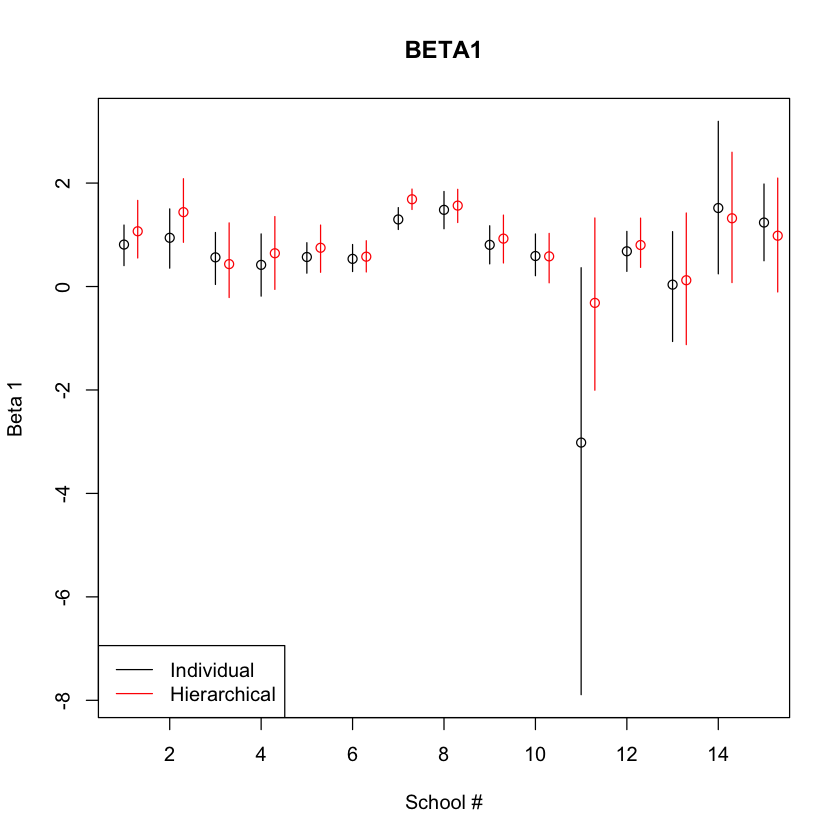

In [78]:
#beta1
par(mfrow=c(1,2))
{
par(mfrow=c(1,1))
chain_b1a = chain_b1b = matrix(nrow=15,ncol=3)
for (k in 1:15){
  cc = Chain$beta[[k]][1000:2000,2]
  chain_b1b[k,1] = mean(cc)
  chain_b1b[k,2:3] = quantile(cc, c(0.025,0.975))
  
  aa = AME_FIT[[k]]$BETA[,2]
  chain_b1a[k,1] = mean(aa)
  chain_b1a[k,2:3] = quantile(aa, c(0.025,0.975))
}

lb = min(c(chain_b1a,chain_b1b))
ub = max(c(chain_b1a,chain_b1b))
plot(chain_b1a[,1],ylim=c(lb,ub), main="BETA1", ylab = "Beta 1", xlab= "School #")
legend("bottomleft", legend=c("Individual", "Hierarchical"), col=c("black", "red"), lty=c(1,1))    
points(seq(1,15)+0.3,chain_b1b[,1],col="red")
segments(seq(1,15),chain_b1a[,2],seq(1,15),chain_b1a[,3])
segments(seq(1,15)+0.3,chain_b1b[,2],seq(1,15)+0.3,chain_b1b[,3], col="red")
}

In the data, school 11 has small sample size and its estimation of covariate effect has large variability. However, with shrinkage effect by hierarchical structure, the variabilty of the estimate decreased notably.